In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [5]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [7]:
X = X.iloc[:, :-2]

In [8]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [9]:
def plots(df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' + str(t).split('(')[0])

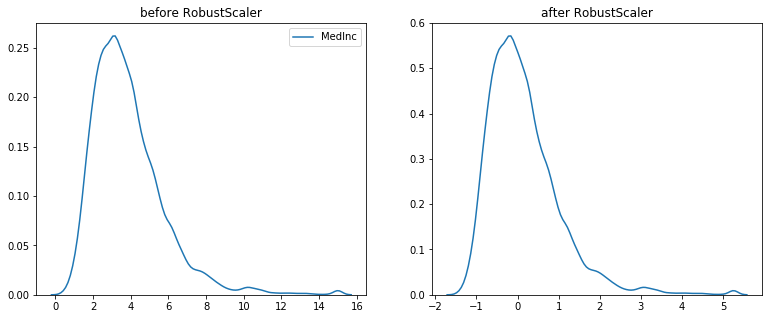

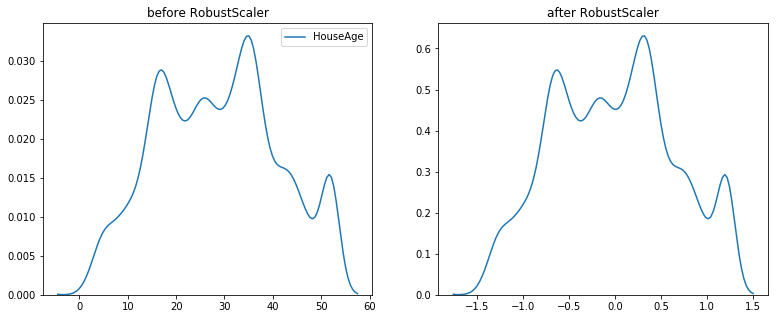

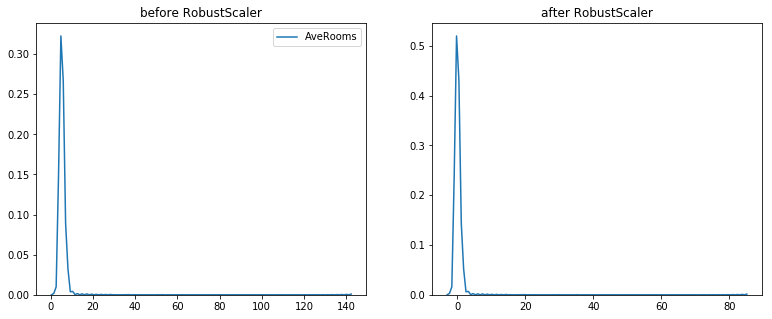

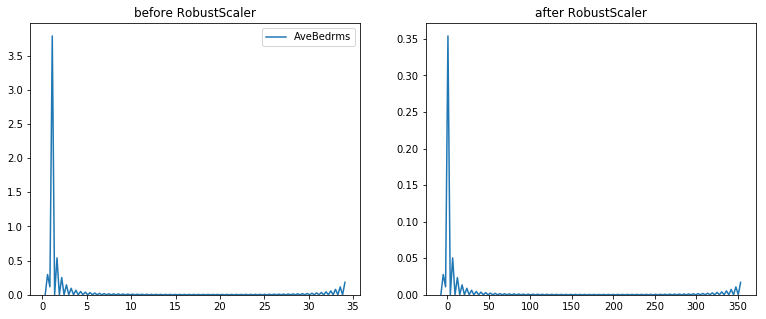

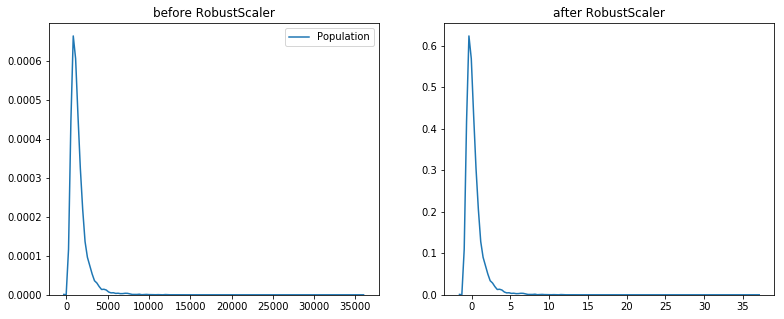

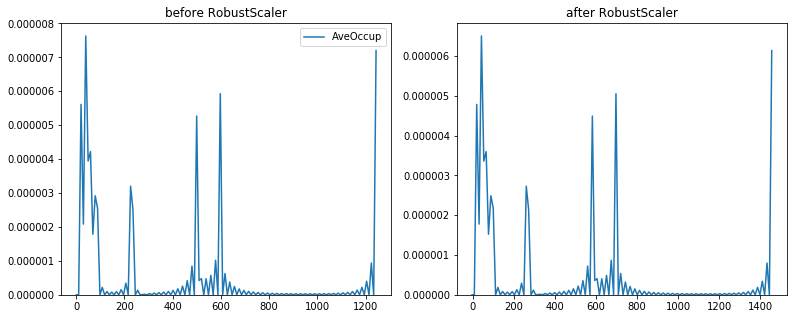

In [10]:
for col in X.columns:
    plots(X, col, RobustScaler())

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=0)

In [12]:
def model_accuracy_scaled(mod):
    model_scaled = Pipeline([
        ('scale', RobustScaler()),
        ('model', mod)
    ])
    model_scaled.fit(X_train, y_train)
    return model_scaled.score(X_test, y_test)

def model_accuracy_unscaled(mod):
    model_unscaled = Pipeline([
        ('model', mod)
    ])
    model_unscaled.fit(X_train, y_train)
    return model_unscaled.score(X_test, y_test)

In [13]:
model_accuracy_scaled(KNeighborsRegressor())

0.6393011074707539

In [14]:
model_accuracy_unscaled(KNeighborsRegressor())

0.17191143873653625

In [15]:
model_accuracy_scaled(RandomForestRegressor(random_state=0))

0.668761483380024

In [16]:
model_accuracy_unscaled(RandomForestRegressor(random_state=0))

0.6687567614986214